##ThinkDSP

This notebook contains solutions to exercises in Chapter 10: Signals and Systems

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [2]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

PI2 = 2 * np.pi

np.set_printoptions(precision=3, suppress=True)
%matplotlib inline

**Exercise:**  The Open AIR library provides a ``centralized... on-line resource for
anyone interested in auralization and acoustical impulse response
data'' (http://www.openairlib.net).  Browse their collection
of impulse response data and download one that sounds interesting.
Find a short recording that has the same sample rate as the impulse
response you downloaded.

Simulate the sound of your recording in the space where the impulse
response was measured, computed two way: by convolving the recording
with the impulse response and by computing the filter that corresponds
to the impulse response and multiplying by the DFT of the recording.

*Solution:* I downloaded the impulse response of the Lady Chapel at St Albans Cathedral http://www.openairlib.net/auralizationdb/content/lady-chapel-st-albans-cathedral

Thanks to Audiolab, University of York: Marcin Gorzel, Gavin Kearney, Aglaia Foteinou, Sorrel Hoare, Simon Shelley.


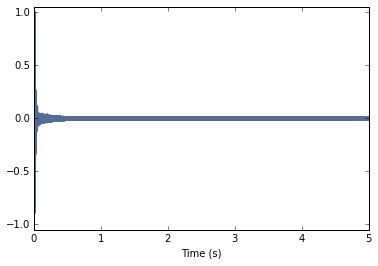

In [38]:
response = thinkdsp.read_wave('stalbans_a_mono.wav')

start = 0
duration = 5
response = response.segment(duration=duration)
response.shift(-start)

response.normalize()
response.plot()
thinkplot.config(xlabel='Time (s)', ylim=[-1.05, 1.05])

Here's what it sounds like:

In [39]:
response.make_audio()

The DFT of the impulse response is the transfer function:

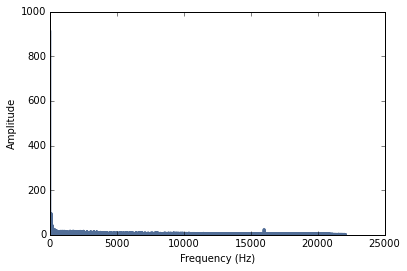

In [40]:
transfer = response.make_spectrum()
transfer.plot()
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

Here's the transfer function on a log-log scale:

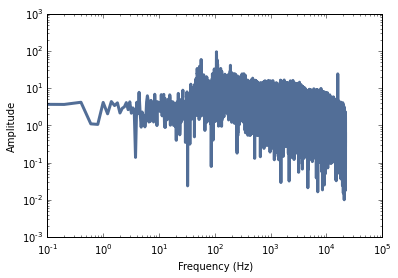

In [41]:
transfer.plot()
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude',
                 xscale='log', yscale='log')

Now we can simulate what a recording would sound like if it were played in the same room and recorded in the same way.  Here's the violin recording we have used before:

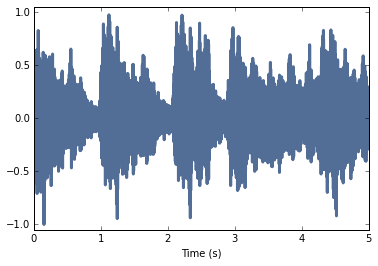

In [42]:
wave = thinkdsp.read_wave('170255__dublie__trumpet.wav')

start = 0.0
wave = violin.segment(start=start)
wave.shift(-start)

wave.truncate(len(response))
wave.normalize()
wave.plot()
thinkplot.config(xlabel='Time (s)', ylim=[-1.05, 1.05])

Here's what it sounds like before transformation:

In [43]:
wave.make_audio()

Now we compute the DFT of the violin recording.

In [44]:
spectrum = wave.make_spectrum()

I trimmed the violin recording to the same length as the impulse response:

In [45]:
len(spectrum.hs), len(transfer.hs)

(110251, 110251)

In [46]:
spectrum.fs

array([     0. ,      0.2,      0.4, ...,  22049.6,  22049.8,  22050. ])

In [47]:
transfer.fs

array([     0. ,      0.2,      0.4, ...,  22049.6,  22049.8,  22050. ])

We we can multiply in the frequency domain and the transform back to the time domain.

In [48]:
output = (spectrum * transfer).make_wave()
output.normalize()

Here's a  comparison of the original and transformed recordings:

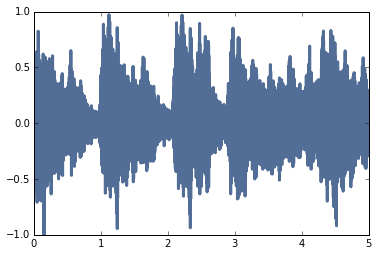

In [49]:
wave.plot()

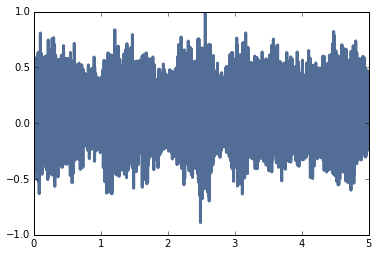

In [53]:
output.plot()

And here's what it sounds like:

In [54]:
output.make_audio()

Now that we recognize this operation as convolution, we can compute it using the convolve method:

In [52]:
convolved2 = wave.convolve(response)
convolved2.normalize()
convolved2.make_audio()